# Convergence Speed Analysis: Unprojected $x_t$

James Yu, 28 July 2022

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
A_1 = np.array([
    [0.99, 0.0075, 0.0025],
    [0.0075, 0.9875, 0.005],
    [0.0025, 0.005, 0.9925]
])

A_2 = np.array([
    [0.48, 0.3, 0.22],
    [0.3, 0.52, 0.18],
    [0.22, 0.18, 0.6]
])

In [3]:
eigvals_1, U_1 = np.linalg.eig(A_1)
eigvals_1

array([1.        , 0.98066987, 0.98933013])

In [4]:
eigvals_2, U_2 = np.linalg.eig(A_2)
eigvals_2

array([1.        , 0.19416995, 0.40583005])

In [5]:
delta = 0.9
c = 1.0
T = 60
x_0 = np.array([[5.0, 10.0, 2.0]], ndmin = 2).T
x_0

array([[ 5.],
       [10.],
       [ 2.]])

# Using the unprojected $x_t$ in the plots and data

In [6]:
def infinite_solution(A, delta, c, x_0):
    eigvals, U = np.linalg.eig(A)
    D = np.diag(eigvals)
    I = np.identity(len(x_0))
    K_t = I
    K_sequence = [K_t]
    while True: # generate solution matrices
        K_t_new = I + (delta * c * (np.linalg.inv((delta * K_t) + (c * I)) @ K_t @ D @ D))
        K_sequence.insert(0, K_t_new)
        if np.allclose(K_t, K_t_new, 
                       rtol = np.finfo(K_t.dtype).eps, 
                       atol = np.finfo(K_t.dtype).eps):
            break
        K_t = K_t_new
        
    tilde_x_0 = U.T @ x_0
    tilde_x_t = tilde_x_0
    r_ts = []
    x_ts = [x_0]
    K_ss = K_sequence[0]
    while True:
        L_ss = -delta * (np.linalg.inv((delta * K_ss) + (c * I)) @ K_ss @ D)
        tilde_r_t = L_ss @ tilde_x_t
        tilde_x_t_new = D @ tilde_x_t + tilde_r_t
        
        x_t_new = U @ tilde_x_t_new
        x_ts.append(x_t_new)
        r_t = U @ tilde_r_t
        r_ts.append(r_t)
        
        if np.allclose(tilde_x_t, tilde_x_t_new, 
                       rtol = np.finfo(tilde_x_t.dtype).eps, 
                       atol = np.finfo(tilde_x_t.dtype).eps):
            break
        tilde_x_t = tilde_x_t_new
        
    return x_ts, r_ts, K_ss

In [7]:
x_sequence_1i, r_sequence_1i, K_ss_1 = infinite_solution(A_1, delta, c, x_0)
x_sequence_2i, r_sequence_2i, K_ss_2 = infinite_solution(A_2, delta, c, x_0)

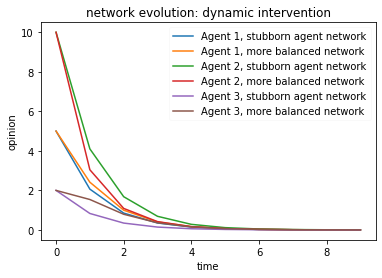

In [8]:
for i in range(3):
    plt.plot(range(10), [x_sequence_1i[j][i].item() for j in range(10)], label = f"Agent {i+1}, stubborn agent network")
    plt.plot(range(10), [x_sequence_2i[j][i].item() for j in range(10)], label = f"Agent {i+1}, more balanced network")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.legend(framealpha = 0.1, loc = "upper right")
plt.title("network evolution: dynamic intervention")
plt.show()

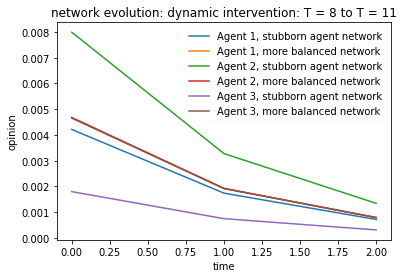

In [9]:
for i in range(3):
    plt.plot(range(3), [x_sequence_1i[j][i].item() for j in range(8, 11)], label = f"Agent {i+1}, stubborn agent network")
    plt.plot(range(3), [x_sequence_2i[j][i].item() for j in range(8, 11)], label = f"Agent {i+1}, more balanced network")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.legend(framealpha = 0.1, loc = "upper right")
plt.title("network evolution: dynamic intervention: T = 8 to T = 11")
plt.show()

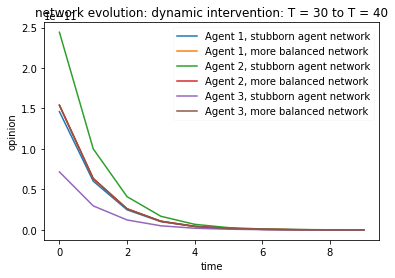

In [10]:
for i in range(3):
    plt.plot(range(10), [x_sequence_1i[j][i].item() for j in range(30, 40)], label = f"Agent {i+1}, stubborn agent network")
    plt.plot(range(10), [x_sequence_2i[j][i].item() for j in range(30, 40)], label = f"Agent {i+1}, more balanced network")
    
plt.xlabel("time")
plt.ylabel("opinion")
plt.legend(framealpha = 0.1, loc = "upper right")
plt.title("network evolution: dynamic intervention: T = 30 to T = 40")
plt.show()

## Direct analysis of the equation

In [11]:
from sympy import *

In [12]:
lambda_2, lambda_3, t, w_1, w_2, w_3 = symbols("lambda_2 lambda_3 t w_1 w_2 w_3")

def K_j_star(lambda_j):
    delta = 0.9
    c = 1.0
    return (delta + delta*c*lambda_j**2 - c + sqrt((c-delta-c*delta*lambda_j**2)**2 + 4*delta*c)) / (2*delta)

tilde_x_t_1 = w_1 * (c/(delta * K_j_star(1) + c))**t
tilde_x_t_2 = w_2 * ((lambda_2 * c)/(delta * K_j_star(lambda_2) + c))**t
tilde_x_t_3 = w_3 * ((lambda_3 * c)/(delta * K_j_star(lambda_3) + c))**t

In [13]:
tilde_x_t_2

w_2*(1.0*lambda_2/(0.45*lambda_2**2 + 0.948683298050514*sqrt(0.225*(0.111111111111111 - lambda_2**2)**2 + 1) + 0.95))**t

In [14]:
tilde_x_t_2.subs(lambda_2, 0.4)

0.202949016216206**t*w_2

In [15]:
tilde_x_t_2.subs(lambda_2, 0.9)

0.388944473488051**t*w_2

In [16]:
eigvals_2

array([1.        , 0.19416995, 0.40583005])

In [17]:
w_1_2 = (np.array(U_2[:, 0], ndmin = 2) @ x_0).item()
w_2_2 = (np.array(U_2[:, 1], ndmin = 2) @ x_0).item()
w_3_2 = (np.array(U_2[:, 2], ndmin = 2) @ x_0).item()
print(w_1_2, w_2_2, w_3_2)

-9.814954576223638 2.7411972377870497 -5.01522725010695


In [18]:
def x_t(t_select):
    # the eigenvalues are re-ordered in the U matrix so correspondingly re-order the indices here
    return np.array([[tilde_x_t_1.subs(t, t_select).subs(w_1, w_1_2),
                  tilde_x_t_3.subs(t, t_select).subs(lambda_3, eigvals_2[1]).subs(w_3, w_2_2),
                     tilde_x_t_2.subs(t, t_select).subs(lambda_2, eigvals_2[2]).subs(w_2, w_3_2)]], dtype = np.float64, ndmin = 2).T

In [19]:
[(U_2 @ x_t(t)).T for t in range(10)]

[array([[ 5., 10.,  2.]]),
 array([[2.41410309, 3.04358516, 1.53945482]]),
 array([[0.99898412, 1.08803398, 0.79298256]]),
 array([[0.40539813, 0.41961799, 0.36038251]]),
 array([[0.16497442, 0.16748413, 0.15544755]]),
 array([[0.06744434, 0.06791849, 0.06545769]]),
 array([[0.02765839, 0.02775165, 0.02724702]]),
 array([[0.0113625 , 0.01138125, 0.01127761]]),
 array([[0.00467225, 0.00467606, 0.00465476]]),
 array([[0.00192215, 0.00192293, 0.00191855]])]

In [20]:
[x.T for x in x_sequence_2i[:20]]

[array([[ 5., 10.,  2.]]),
 array([[2.41410309, 3.04358516, 1.53945482]]),
 array([[0.99898412, 1.08803398, 0.79298256]]),
 array([[0.40539813, 0.41961799, 0.36038251]]),
 array([[0.16497442, 0.16748413, 0.15544755]]),
 array([[0.06744434, 0.06791849, 0.06545769]]),
 array([[0.02765839, 0.02775165, 0.02724702]]),
 array([[0.0113625 , 0.01138125, 0.01127761]]),
 array([[0.00467225, 0.00467606, 0.00465476]]),
 array([[0.00192215, 0.00192293, 0.00191855]]),
 array([[0.00079096, 0.00079112, 0.00079022]]),
 array([[0.00032551, 0.00032555, 0.00032536]]),
 array([[0.00013397, 0.00013398, 0.00013394]]),
 array([[5.51410168e-05, 5.51424051e-05, 5.51345694e-05]]),
 array([[2.26955106e-05, 2.26957961e-05, 2.26941845e-05]]),
 array([[9.34132474e-06, 9.34138346e-06, 9.34105198e-06]]),
 array([[3.84484329e-06, 3.84485536e-06, 3.84478719e-06]]),
 array([[1.58252160e-06, 1.58252408e-06, 1.58251006e-06]]),
 array([[6.51359969e-07, 6.51360480e-07, 6.51357595e-07]]),
 array([[2.68097454e-07, 2.68097559e-

In [21]:
[x.T for x in x_sequence_1i[:20]]

[array([[ 5., 10.,  2.]]),
 array([[2.06418248, 4.10009498, 0.83286561]]),
 array([[0.85212992, 1.68111278, 0.34675796]]),
 array([[0.35175763, 0.68930079, 0.1443402 ]]),
 array([[0.14519831, 0.28263744, 0.06007035]]),
 array([[0.05993221, 0.11589363, 0.02499468]]),
 array([[0.0247366 , 0.0475224 , 0.01039805]]),
 array([[0.01020942, 0.01948705, 0.0043249 ]]),
 array([[0.00421351, 0.00799103, 0.00179854]]),
 array([[0.00173887, 0.00327694, 0.00074781]]),
 array([[0.00071759, 0.00134383, 0.00031087]]),
 array([[0.00029612, 0.00055109, 0.00012921]]),
 array([[1.22190111e-04, 2.26005023e-04, 5.36982997e-05]]),
 array([[5.04186451e-05, 9.26870368e-05, 2.23123095e-05]]),
 array([[2.08031753e-05, 3.80126981e-05, 9.26961785e-06]]),
 array([[8.58324886e-06, 1.55900377e-05, 3.85047363e-06]]),
 array([[3.54125874e-06, 6.39402579e-06, 1.59920131e-06]]),
 array([[1.46099172e-06, 2.62246880e-06, 6.64095225e-07]]),
 array([[6.02729207e-07, 1.07561038e-06, 2.75738458e-07]]),
 array([[2.48645932e-07, 

In [22]:
[(x1[1].item(), x2[1].item()) for x1, x2 in zip(x_sequence_1i, x_sequence_2i)]

[(10.0, 10.0),
 (4.100094976298595, 3.0435851556157436),
 (1.6811127755191666, 1.0880339779622135),
 (0.6893007924321484, 0.4196179879314551),
 (0.28263743779611467, 0.16748413294571807),
 (0.11589362840292444, 0.06791848686135611),
 (0.04752240132892549, 0.027751647852908404),
 (0.019487051018635543, 0.011381252035864617),
 (0.007991030258383111, 0.004676064798798378),
 (0.003276938703131409, 0.0019229268180722188),
 (0.001343825045234422, 0.0007911158965362055),
 (0.0005510943965090831, 0.00032554783508155185),
 (0.00022600502266265549, 0.00013397942765427847),
 (9.268703679880107e-05, 5.51424051195609e-05),
 (3.801269808271404e-05, 2.2695796129948694e-05),
 (1.5590037686338403e-05, 9.341383459521136e-06),
 (6.394025787023252e-06, 3.844855364674203e-06),
 (2.6224688019264763e-06, 1.5825240830006991e-06),
 (1.0756103789629757e-06, 6.513604796672285e-07),
 (4.411723883423472e-07, 2.6809755898466443e-07),
 (1.8095489092087965e-07, 1.1034800948769264e-07),
 (7.422342133730131e-08, 4.5418

In [23]:
[(x1[1].item() > x2[1].item()) for x1, x2 in zip(x_sequence_1i, x_sequence_2i)]

[False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [24]:
[(x1[2].item(), x2[2].item()) for x1, x2 in zip(x_sequence_1i, x_sequence_2i)]

[(2.0, 2.0),
 (0.8328656073393146, 1.539454821531357),
 (0.3467579610481128, 0.7929825596869848),
 (0.1443402026830264, 0.3603825097716313),
 (0.060070354986982405, 0.15544754762385665),
 (0.0249946839742091, 0.06545768787529051),
 (0.010398054887758584, 0.02724701780279769),
 (0.004324898349524149, 0.01127761217333705),
 (0.0017985449265999678, 0.0046547635444597),
 (0.0007478085362446748, 0.001918547124550981),
 (0.00031087468332444644, 0.000790215235764335),
 (0.00012921355970642998, 0.0003253626023626952),
 (5.369829972723291e-05, 0.0001339413304298272),
 (2.231230946146887e-05, 5.5134569408331905e-05),
 (9.269617847032859e-06, 2.2694184489478487e-05),
 (3.850473631936499e-06, 9.341051977330362e-06),
 (1.599201306304735e-06, 3.8447871852441365e-06),
 (6.640952248440389e-07, 1.5825100598019486e-06),
 (2.7573845802190763e-07, 6.513575953628687e-07),
 (1.1447365811603196e-07, 2.68096965738118e-07),
 (4.7517811697433044e-08, 1.1034788746814307e-07),
 (1.9722016805793316e-08, 4.54188361

In [25]:
[(x1[2].item() > x2[2].item()) for x1, x2 in zip(x_sequence_1i, x_sequence_2i)]

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]